# **GROUP 7** Oktay, Nara, Luis
# <span style="color:#AA00FF"> Towards a FIFA metaverse </span>.
**<span style="color:#AA00FF">Pricing the future avatars of FIFAverse based on value and performance data of the players</span>.**



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px

## Function and Results

# 01 Data import, Features name cleaning and first exploration
<div class="alert alert-block alert-info">
<b>info:</b> Here a function is defined. 
    The data is cleaned and prepared for a first analysis and then clean again until the complete function was built
</div>

In [2]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

Import the data and apply the function

In [14]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


AGE  OVERALL  BEST_OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH    VALUE  \
11589   20       62            63         72     5.9     148      10   500000   
6908    25       75            77         77     5.9     141       2  8000000   
15490   26       69            69         70     5.9     143       1  1200000   
11777   24       75            77         79     6.3     174       4  9000000   
3566    28       69            69         69     6.0     159       0  1000000   
2984    29       73            72         73     6.0     174       0  4000000   
4450    26       71            73         73     6.1     172       2  2500000   
8316    23       62            63         71     6.1     174       9   475000   
9232    23       76            78         80     6.0     196       4  9000000   
4941    29       63            63         63     5.1     157       0   350000   

        WAGE  RELEASE_CLAUSE  ATTACKING  CROSSING  FINISHING  \
11589   1000               0        282        67         61   
6908   16000        11800000        311        66         65   
15490   2000         1700000        301        67         60   
11777  21000        14200000        365        69         73   
3566    4000         1400000        326        62         65   
2984   30000         7600000        340        58         75   
4450    4000         4700000        213        32         20   
8316     650          831000        276        63         54   
9232   20000        19600000        249        45         28   
4941    2000          438000        259        62         55   

       HEADING_ACCURACY  SHORT_PASSING  VOLLEYS  SKILL  DRIBBLING  CURVE  \
11589                45             60     49.0    284         67   52.0   
6908                 42             77     61.0    358         78   62.0   
15490                43             67     64.0    328         70   63.0   
11777                77             75     71.0    310         69   51.0   
3566                 69             69     61.0    319         63   61.0   
2984                 75             62     70.0    311         72   53.0   
4450                 74             64     23.0    223         45   28.0   
8316                 55             57     47.0    283         66   54.0   
9232                 76             68     32.0    277         60   39.0   
4941                 39             61     42.0    242         61   47.0   

       FREE_KICK_ACCURACY  LONG_PASSING  BALL_CONTROL  MOVEMENT  ACCELERATION  \
11589                  37            61            67       335            74   
6908                   63            76            79       375            76   
15490                  56            68            71       354            70   
11777                  52            63            75       350            70   
3566                   64            64            67       333            53   
2984                   62            52            72       342            68   
4450                   26            67            57       288            61   
8316                   52            50            61       330            80   
9232                   38            71            69       275            58   
4941                   35            37            62       366            81   

       SPRINT_SPEED  AGILITY  REACTIONS  BALANCE  POWER  SHOT_POWER  JUMPING  \
11589            69     70.0         45     77.0    248          63     40.0   
6908             72     76.0         74     77.0    346          70     82.0   
15490            70     75.0         69     70.0    325          73     57.0   
11777            82     68.0         76     54.0    370          74     74.0   
3566             66     74.0         72     68.0    374          69     80.0   
2984             74     70.0         70     60.0    353          72     78.0   
4450             62     56.0         68     41.0    285          42     77.0   
8316             81     63.0         52  

In [4]:
fig = px.scatter(df_cleaned, y="VALUE", x="ID", color="VALUE")
fig.update_traces(marker_size=10)
fig.update_layout(title="Value",
                  xaxis_title="PLAYERS",
                  yaxis_title="VALUE")
fig.update_xaxes(showticklabels=False)
fig.show()
fig = px.scatter(df_cleaned, y="OVERALL", x="VALUE", color="OVERALL")
fig.update_traces(marker_size=10)
fig.update_layout(title="Value and Overall",
                  xaxis_title="VALUE",
                  yaxis_title="OVERALL")

In [5]:
#Cheking how many players has a value of 0
df_cleaned['VALUE'].value_counts()[0]


457

In [19]:
#Remove values  > 5437500 is the upper limmit for iqr
#df_cleaned =df_cleaned[df_cleaned['VALUE'] < 5437500]
iqr = np.percentile(df_cleaned['VALUE'],75) - np.percentile(df_cleaned['VALUE'],25) # data['IC1'].quantile(0.75)
upper_limit = np.percentile(df_cleaned['VALUE'],75) + 1.5*iqr
lower_limit = np.percentile(df_cleaned['VALUE'],25) - 1.5*iqr
df_cleaned = df_cleaned[(df_cleaned['VALUE']>lower_limit)& (df_cleaned['VALUE']<upper_limit)]
df_cleaned.shape

(14821, 107)

# 02 Exploration
## Here I separate numerical and categorical features. 
 - df_numeric
 - df_object

<div class="alert alert-block alert-success">
    <b>Tip:</b>This step is done on DATA_EXPLORATION FILE. Please for more information open that Notebook
    </div>

In [20]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 
print(df_numeric.shape,df_object.shape)

(14821, 63) (14821, 44)


# 03 Process / Transformations

---
<div class="alert alert-block alert-info">
<b>Important:</b> Here we start to prepare the data for the training 
</div>

##  Select variables relevant for the model
### Categoricals
    -BEST_POSITION
    -FOOT
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -POTENTIAL
    -HEIGHT
    -WEIGHT
    -GROWTH
    

<div class="alert alert-block alert-success">
<b>Tip:</b> To a detail explanations about the decisions made. Check excel 
</div>

In [21]:
df_object_selected=df_object[['BEST_POSITION','FOOT','ATTACKING_WORK_RATE','DEFENSIVE_WORK_RATE']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT','SKILL_MOVES','WEEK_FOOT_ABILITY']]
print(df_object_selected.shape,df_numeric_selected.shape)

(14821, 4) (14821, 8)


---
#### Check unique values in Selected Categorical features
>We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [22]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  BEST_POSITION  has  15  categories 
 The single values are:  ['LWB' 'CM' 'CAM' 'ST' 'RW' 'CB' 'GK' 'CF' 'CDM' 'RWB' 'LB' 'LM' 'RM' 'RB'
 'LW']
Here the detail: 
 CB     2894
ST     2351
CAM    1858
GK     1410
RM     1255
CDM    1051
LB      806
CM      791
RB      775
LM      680
RW      282
LWB     219
RWB     217
LW      172
CF       60
Name: BEST_POSITION, dtype: int64



This feature  FOOT  has  2  categories 
 The single values are:  ['Left' 'Right']
Here the detail: 
 Right    11209
Left      3612
Name: FOOT, dtype: int64



This feature  ATTACKING_WORK_RATE  has  4  categories 
 The single values are:  ['Medium' 'Unknown' 'Low' 'High']
Here the detail: 
 Medium     9879
High       4060
Low         793
Unknown      89
Name: ATTACKING_WORK_RATE, dtype: int64



This feature  DEFENSIVE_WORK_RATE  has  4  categories 
 The single values are:  ['High' 'Medium' 'Low' 'Unknown']
Here the detail: 
 Medium     10761
High        2411
Low         1560
Unknown       89
Name: D

---
#### Check  values in Selected Numerical features
>We need to test which distribution the variables have and decide the transformation we use. 
>We should remove fetautures with a strong correlation for a linear regression
>In case of a logaritmit regression we don´t need to transform variables

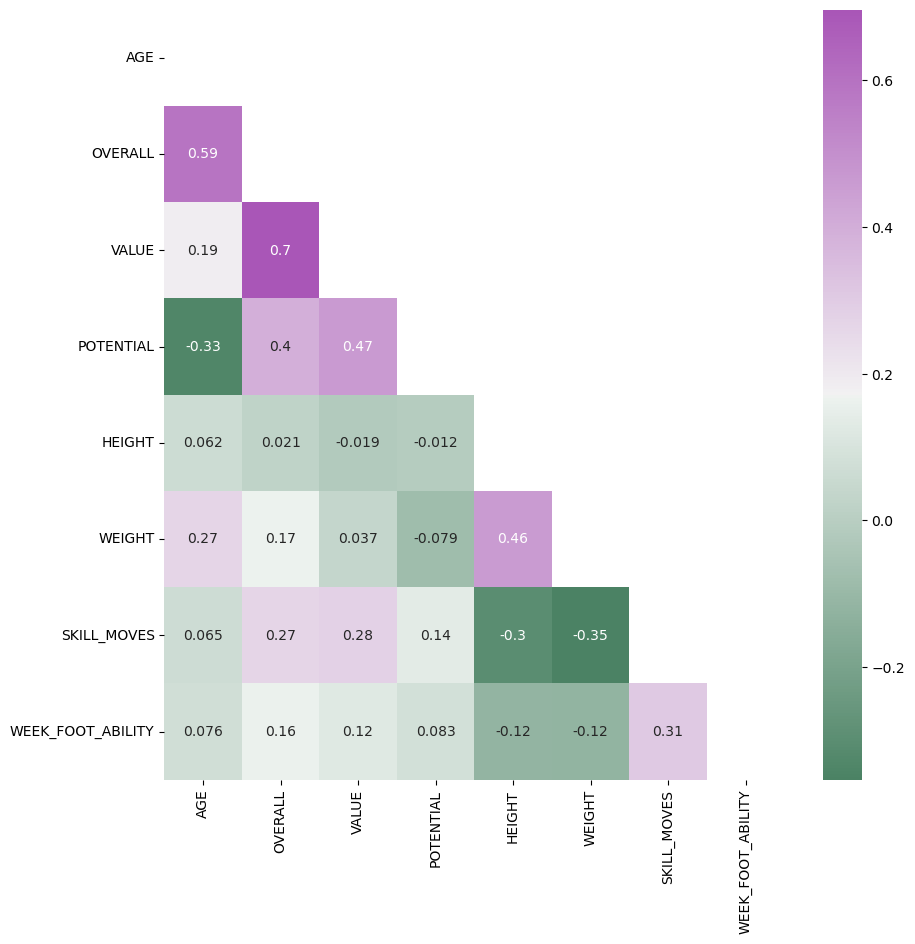

In [23]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

Explanations for this graph: 
>We have selected variables with low correlation
>Please check if we need Growth is correlated with age. Not bigger than 0.9 it should be ok. 
>Value is our target

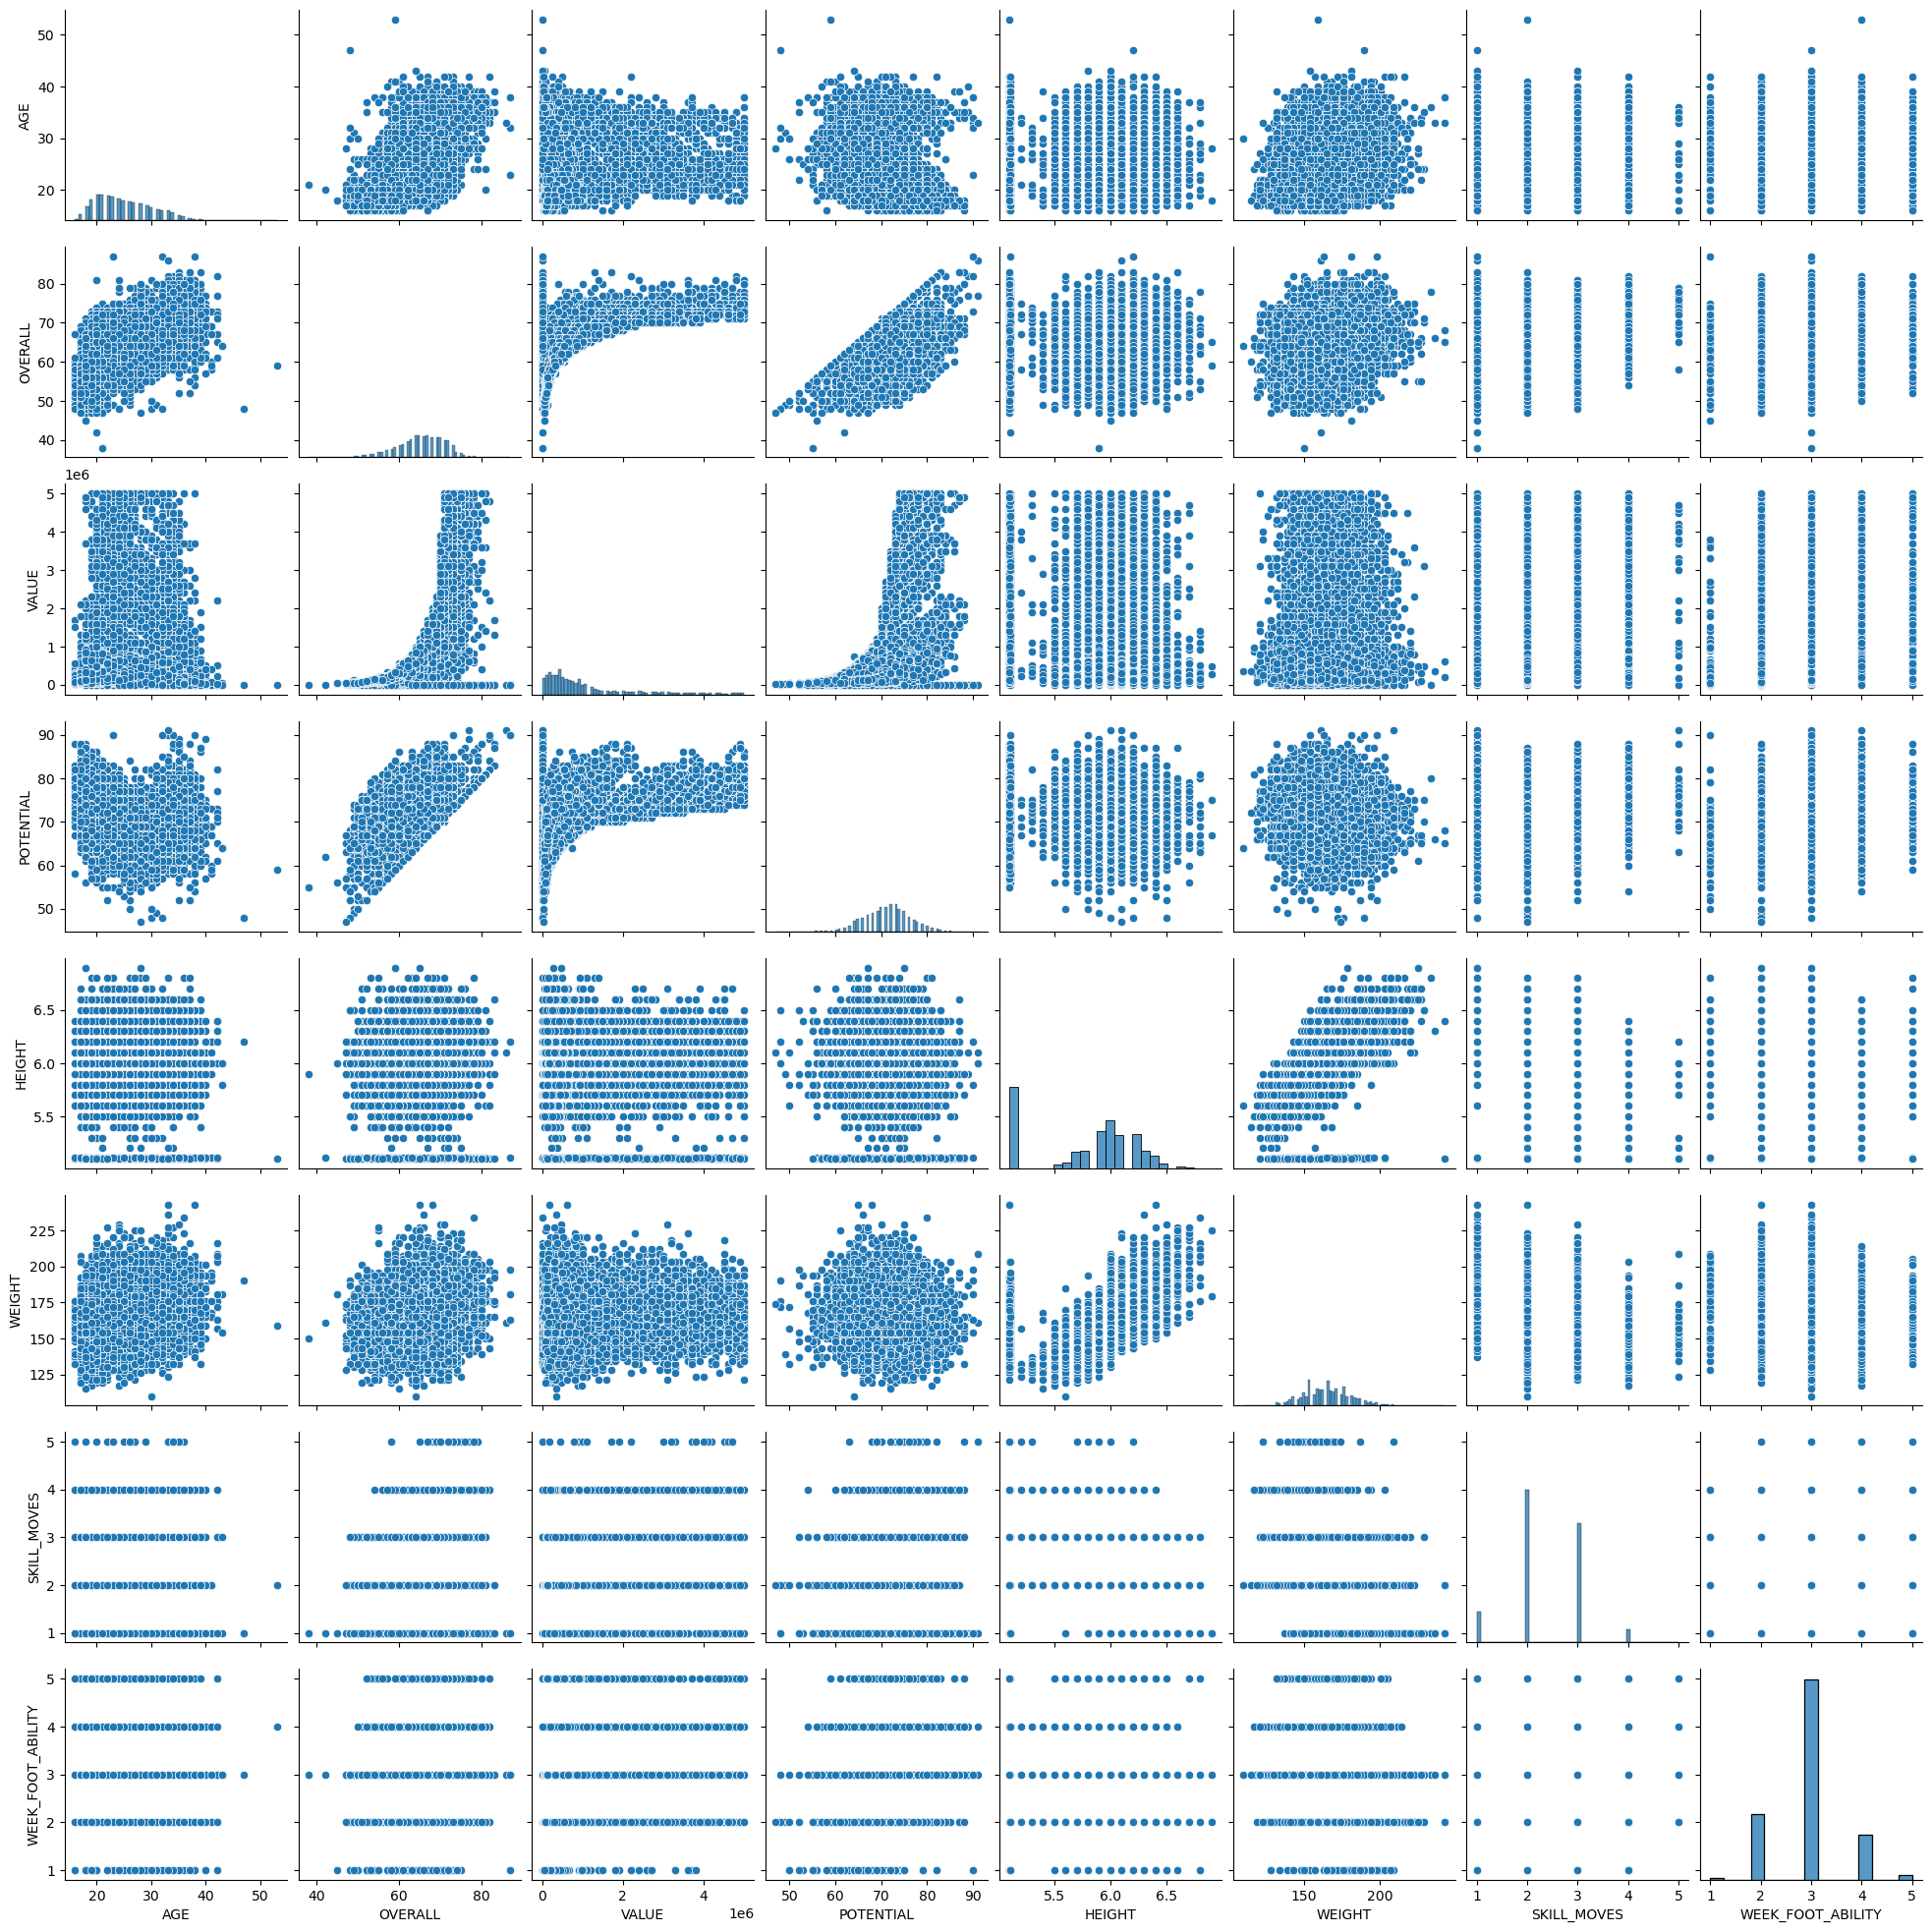

In [24]:
sns.pairplot(df_numeric_selected)

## 02.01 Encoding

We Encode the BEST_POSITION feature to keep the most relevant categories. In total they are four

In [25]:
# Create a dictionary that maps old categories to new categories
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

In [ ]:
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)
print(df_object_encoded.shape)

## 02.02 Numericals normalization / transformation

<div class="alert alert-block alert-danger">
<b>Danger:</b> We separate first target and the rest of the variables. 
</div>

The distributions and the outliers for the selected variables are plotted here. This helps us to decide if we need a normalization or a standarization

In [ ]:
#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_vars=df_numeric_selected.drop(columns='VALUE')
df_numeric_vars.sample(4)

In [ ]:
print(X_Target.shape,df_numeric_vars.shape)

In [ ]:
#Range is set between 0 and 1 
#Min Max transformation
transformer = MinMaxScaler().fit(df_numeric_vars) 
x_minmax = transformer.transform(df_numeric_vars) #Array
df_numeric_vars_temp = pd.DataFrame(x_minmax,columns=df_numeric_vars.columns) ## Convert to dataframe


## Print the dristribution plots for the numerical values. 
#for column in df_numeric_vars_temp.columns:
#    sns.distplot(df_numeric_vars_temp[column])
#    plt.show()

In [ ]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
df_numeric_vars_tranformed=df_numeric_vars_temp


for column in df_numeric_vars_tranformed.columns:
    df_numeric_vars_tranformed[column] = np.where(df_numeric_vars_tranformed[column]<=0, np.NAN, df_numeric_vars_tranformed[column]) # data['HV1'].mean()
    df_numeric_vars_tranformed[column] = df_numeric_vars_tranformed[column].fillna(df_numeric_vars_tranformed[column].mean())
    transformed_data, _ci = stats.boxcox(df_numeric_vars_tranformed[column])

In [ ]:
df_numeric_vars_tranformed.shape

In [ ]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_vars_tranformed[column], ax=axes[row_idx, col_idx], kde=True, color='green')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric_vars_tranformed[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# 04 Train the model

>Finally we create the dataframe to test the model 

We have two dataframes:

    -Target or Y
    -Variables or X

In [ ]:
Y=X_Target
#X=pd.concat([df_numeric_vars_tranformed, df_object_encoded], axis=1)
X = pd.concat([df_numeric_vars_tranformed.reset_index(drop=True), df_object_encoded.reset_index(drop=True)], axis=1)
X
#X.reset_index()
print(X.shape,Y.shape)

In [ ]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

# 05 Model Validations and Vizs

In [ ]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

In [ ]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)